In [26]:
# open dataframe.pkl from C:\Users\leona\OneDrive\Documents\GitHub\complexity_72h\Dataset\dataframe.pkl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections import Counter
# svg output in plots
import tqdm as tqdm
from itertools import chain
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
with open(r"../Dataset/dataframe.pkl", 'rb') as fp:
    df=pickle.load(fp)

In [3]:
# open the same file with pandas
df = pd.read_pickle(r"../Dataset/dataframe.pkl")


In [4]:
df.head()

,Time,Simplices
0,1987.0,[1.0]
1,2007.0,[2.0]
2,2011.0,"[4.0, 3.0]"
3,1998.0,[5.0]
4,1985.0,"[7.0, 8.0, 6.0]"


In [6]:
# cast int every time
df['Time'] = df['Time'].astype(int)
df

,Time,Simplices
0,1987,[1.0]
1,2007,[2.0]
2,2011,"[4.0, 3.0]"
3,1998,[5.0]
4,1985,"[7.0, 8.0, 6.0]"
...,...,...
1590330,1995,[834497.0]
1590331,2014,"[1261125.0, 156322.0, 1261126.0]"
1590332,2015,"[610947.0, 1261128.0, 1086071.0, 1261127.0]"
1590333,2015,"[1261129.0, 176076.0]"


In [7]:
def to_int(lista):
    return [int(i) for i in lista]

# apply to_int to every element of the column
df['Simplices'] = df['Simplices'].apply(to_int)

In [8]:
df.head()

,Time,Simplices
0,1987,[1]
1,2007,[2]
2,2011,"[4, 3]"
3,1998,[5]
4,1985,"[7, 8, 6]"


# Papers per year

In [9]:
# first and last timestamp
print('Fist timestamp: ')
print(df['Time'].min())
print('Last timestamp: ')
print(df['Time'].max())

Fist timestamp: 
1800
Last timestamp: 
2018


In [10]:
# print the number of paper per year
# for every time in df['Time'] count the number of Simplices

years = df['Time'].unique()

# create a dictionary with year as key and number of simplices as value
paper_per_year = {}
for year in years:
    paper_per_year[year] = df[df['Time'] == year].shape[0]
    


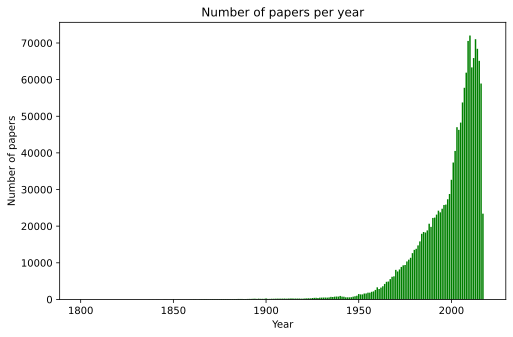

In [11]:
# plot the number of paper per year
plt.figure(figsize=(8,5))
plt.bar(paper_per_year.keys(), paper_per_year.values(), color='g')
plt.xlabel('Year')
plt.ylabel('Number of papers')
plt.title('Number of papers per year')
plt.show()

# Paper per size

In [12]:
# create a new column that is the len of df['Simplices']
df['Size'] = df['Simplices'].apply(lambda x: len(x))

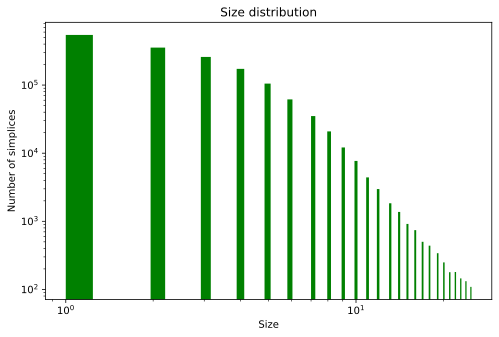

In [13]:
# plot size distribution
plt.figure(figsize=(8,5))
plt.hist(df['Size'], bins=100, color='g')
plt.xlabel('Size')
plt.ylabel('Number of simplices')
plt.yscale('log')
plt.xscale('log')
plt.title('Size distribution')
plt.show()

# Paper per author

In [14]:
# flatten this list(df['Simplices'])
simplices = [item for sublist in df['Simplices'].values.reshape(-1,1) for item in sublist]
# flatten simplices that is a list of lists
node_list_with_repetitions = [item for sublist in simplices for item in sublist]
nodes = set([item for sublist in simplices for item in sublist])

In [15]:
node_occurencies = Counter(node_list_with_repetitions)
    

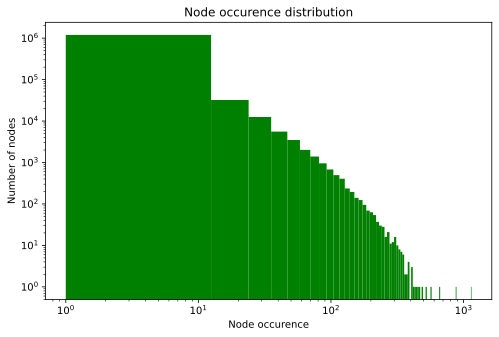

In [16]:
# print node occurence distribution
plt.figure(figsize=(8,5))
plt.hist(node_occurencies.values(), bins=100, color='g')
plt.xlabel('Node occurence')
plt.ylabel('Number of nodes')
plt.yscale('log')
plt.xscale('log')
plt.title('Node occurence distribution')
plt.show()


# Collaborator per author

In [17]:
# reduce the dataset from year 2000
df_2000 = df[df['Time'] >= 1950]
df_2000.head()

,Time,Simplices,Size
1,2007,[2],1
2,2011,"[4, 3]",2
7,2000,[14],1
8,2014,"[16, 17, 15, 18]",4
10,2007,"[23, 21, 22, 24]",4


In [18]:
simplices_2000 = [item for sublist in df_2000['Simplices'].values.reshape(-1,1) for item in sublist]
# flatten simplices that is a list of lists
node_list_with_repetitions_2000 = [item for sublist in simplices_2000 for item in sublist]
nodes_2000 = set([item for sublist in simplices_2000 for item in sublist])


# Pruning

In [73]:
# reduce the dataset up to year 2000
upper_bound = 1950
df_pruned = df[df['Time'] <= upper_bound]
df_pruned.head()

,Time,Simplices,Size
985411,1800,[115873],1
891993,1800,[879232],1
752898,1800,[115873],1
832182,1800,[841076],1
1029825,1800,[963438],1


In [74]:
# reduce the dataset from to year 2000
lower_bound = 1950
df_pruned_inv = df[df['Time'] >= lower_bound]
df_pruned_inv.head()

,Time,Simplices,Size
669926,1950,[313780],1
1034829,1950,[966386],1
598009,1950,"[250788, 119144]",2
685272,1950,"[741137, 741138]",2
92948,1950,[176885],1


In [75]:
# flatten this list(df['Simplices'])
simplices = [item for sublist in df_pruned['Simplices'].values.reshape(-1,1) for item in sublist]
# flatten simplices that is a list of lists
node_list_with_repetitions = [item for sublist in simplices for item in sublist]
nodes_till_upper_bound = set([item for sublist in simplices for item in sublist])

In [76]:
# node after upper bound are nodes - nodes_till_upper_bound
nodes_after_upper_bound = nodes - nodes_till_upper_bound

In [77]:
# check len of nodes = len of nodes_till_upper_bound + len of nodes_after_upper_bound

print(len(nodes) == len(nodes_till_upper_bound) + len(nodes_after_upper_bound))

# print their len
print(len(nodes_till_upper_bound))
print(len(nodes_after_upper_bound))

True
17788
1238597


In [78]:
# creat a dictionary with keys nodes in nodes_till_upper_bound 
first_appearence_dict = {}

df.sort_values(by=['Time'], inplace=True)
# loop over time from upper_bound till time max, if a node appear for the first time, add it to the dictionary
for time in range(upper_bound, int(df['Time'].max() )+1):
    nodes_in_this_year = set(list(chain(*list(df[df['Time'] == time]['Simplices'])) ) )
    for node in nodes_in_this_year:
        if node not in nodes_till_upper_bound:
            first_appearence_dict[int(node)] = int(time )    


In [79]:
first_appearence_dict

{475136: 1951,
 475137: 1951,
 1089550: 1951,
 90137: 1954,
 860198: 1953,
 204841: 1951,
 41008: 1974,
 1171511: 1951,
 262199: 1951,
 467014: 1971,
 614480: 1951,
 32875: 2014,
 647275: 1951,
 450672: 1951,
 1187963: 1951,
 508040: 1955,
 172169: 2008,
 327818: 1951,
 143: 1975,
 1122464: 1951,
 368824: 1958,
 204989: 1983,
 696537: 1951,
 794854: 1951,
 16622: 2013,
 16623: 1968,
 1097971: 1951,
 295157: 1951,
 565495: 1963,
 262400: 1951,
 262401: 1951,
 180487: 1981,
 893196: 1951,
 925967: 1951,
 41261: 2010,
 172335: 1970,
 315: 1987,
 41276: 1979,
 41279: 1981,
 295233: 1989,
 295234: 1951,
 82253: 1971,
 377166: 1954,
 287062: 2007,
 770403: 2012,
 655716: 1951,
 1237350: 1951,
 950631: 1951,
 467306: 1951,
 1171855: 1951,
 65936: 2016,
 393618: 1988,
 557479: 1951,
 557480: 1951,
 1016233: 1951,
 16810: 2005,
 557481: 1951,
 786864: 1951,
 786865: 1955,
 713142: 1951,
 1057228: 1951,
 1057229: 1951,
 164312: 1954,
 164317: 1995,
 1163754: 1952,
 442876: 1951,
 442877: 1984,
 

# Dataset Authors vs years

In [80]:
# create an empty dataset with rows nodes_after_upper_bound and colums years from upper_bound to time max
df_authors_years = pd.DataFrame(index=nodes_after_upper_bound, columns=range(upper_bound, int(df['Time'].max() )+1))

# ever elemet of the df is a empty list
df_authors_years = df_authors_years.applymap(lambda x: [])

df_authors_years.head()


,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
3,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
4,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
5,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]


In [81]:
# for index in index of df_pruned_inv read simplices and for every node in simplices df_authors_years[node][year] = index

for index in tqdm.tqdm(df_pruned_inv.index):
    for node in df_pruned_inv['Simplices'][index]:
        if node in nodes_after_upper_bound:
            time = df_pruned_inv['Time'][index]
            # print(time)
            # print(df_pruned_inv['Simplices'][index])

            df_authors_years[time][node].append(index)



100%|██████████| 1563854/1563854 [01:41<00:00, 15461.00it/s]


In [82]:
df_authors_years

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
2,[],[],[],[],[],[],[],[],[],[],...,[],[],[370566],[],[],[],[],[],[],[]
3,[],[],[],[],[],[],[],[],[],[],...,"[909621, 955013, 1478407, 622246, 475214, 1968...","[1192134, 253975, 1590165, 1033910, 647973, 77...","[1545830, 37334, 2, 1222945]","[299209, 1277496, 80489, 554441]","[1148053, 702051, 814662, 397639, 1581221, 696...","[1249616, 287536, 67831]","[120538, 1546017]","[632010, 1084807, 680713, 1030226, 1385280]","[358795, 480568]",[]
4,[],[],[],[],[],[],[],[],[],[],...,[],[983724],[2],[],[],[128154],"[1102121, 81636]",[],[],[]
5,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261125,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[1590331],[],[],[],[]
1261126,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[1590331],[],[],[],[]
1261127,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[1590332],[],[],[]
1261128,[],[],[],[],[],[],[],[],[],[],...,[],[],[],[],[],[],[1590332],[],[],[]
